In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

import dlmhelper.data
import dlmhelper.tools

In [3]:
dataset = sm.datasets.co2.load()

In [4]:
print(sm.datasets.co2.TITLE)

Mauna Loa Weekly Atmospheric CO2 Data


In [5]:
dataset.data.co2

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64

Now we create a time series object from this data using the following inputs:

- **time64 & data** : provide the data with corresponding time (given as numpy.datetime64) values
- **product_type** : allows to save some identifier with the data
- **time_unit** : the time unit declares what a single time step corresponds to



In [6]:
time64 = np.asarray(dataset.data.index)
data = np.asarray(dataset.data.co2)

product_type="Mauna_Loa_CO2"
time_unit = "week"

In [7]:
#Uncomment to see the docstring for TimeSeries
#?dlmhelper.data.TimeSeries

In [8]:
timeseries = dlmhelper.data.TimeSeries(data, time64 = time64, time_unit=time_unit, product_type=product_type)

The timeseries can be quickly plotted

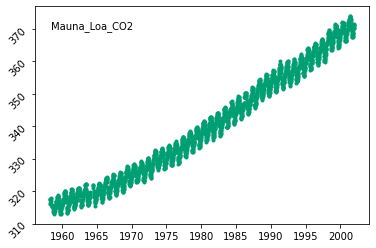

In [9]:
_fig, _ax = timeseries.plot()

Next we perform a single dynamic linear fit on the time series

In [10]:
result = dlmhelper.tools.dlm_fit(timeseries, "Mauna_Loa_CO2_test",level=True, variable_level=False,trend=True, variable_trend=True,
                    seasonal=True, autoregressive=1, irregular=True, seasonal_period = [52], 
                       )

In [11]:
#Uncomment to see the docstring for dlm_fit
#?dlmhelper.tools.dlm_fit

We can quicky visualize an overview of the results

/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:866: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(time, self.trend+np.sqrt(self.trend_cov),color=CF,ls='--')
/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:867: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(time, self.trend-np.sqrt(self.trend_cov),color=CF,ls='--')
/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:871: RuntimeWarning: invalid value encountered in sqrt
  _ymax = np.nanpercentile(self.trend+np.sqrt(self.trend_cov),99)
/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:872: RuntimeWarning: invalid value encountered in sqrt
  _ymin = np.nanpercentile(self.trend-np.sqrt(self.trend_cov),1)


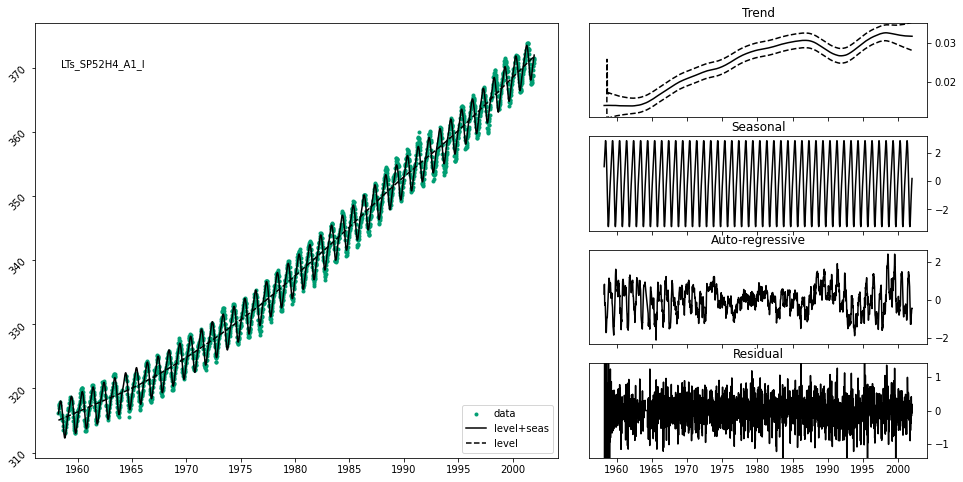

In [12]:
fig = result.plot_summary(figsize=(16,8))

It is also possible to perform an ensemble fit on the data using a single command. We keep the standard values for the level and trend component and 

In [13]:
seasonal = [True, False]

seasonal_period = [
                [52]
                ]
seasonal_harmonics = [
                    [[1,2]]
                    ]

variable_seasonal = [
                    [[False]]
                    ]

autoregressive = [None,1]
irregular = [True, False]

In [14]:
result_list = dlmhelper.tools.dlm_ensemble(timeseries, "CO2_ensemble_test",
                                           seasonal=seasonal, seasonal_period=seasonal_period,
                                           seasonal_harmonics=seasonal_harmonics,variable_seasonal = variable_seasonal,
                                           autoregressive=autoregressive, irregular=irregular)

In [15]:
result_list.summary()

| Model           | converged   |     aic |       ll |      ssr |      mse |   cov_level |   cov_trend |   cov_seas |    cov_ar |   cv_amse |   agg |
|:----------------|:------------|--------:|---------:|---------:|---------:|------------:|------------:|-----------:|----------:|----------:|------:|
| LTs_SP52H2_A1_I | True        | 2278.22 | -1135.11 | 1818.92  | 0.819704 |   0.0551702 | 3.89396e-06 | 0.00496236 | 0.0893292 |       nan |   nan |
| LTs_SP52H2_A1   | True        | 2398.29 | -1196.14 | 1607.61  | 0.724476 |   0.0372615 | 6.95113e-06 | 0.00616    | 0.0493256 |       nan |   nan |
| LTs_SP52H1_A1_I | True        | 2529.56 | -1260.78 | 1150.43  | 0.51798  |   0.0628057 | 3.96323e-06 | 0.00570997 | 0.0942135 |       nan |   nan |
| LTs_SP52H1_A1   | True        | 2566.73 | -1280.37 | 1086.47  | 0.489179 |   0.0503762 | 4.39114e-06 | 0.00612512 | 0.0633981 |       nan |   nan |
| LTs_SP52H2_I    | True        | 2619.49 | -1307.75 | 2100.31  | 0.946514 |   0.0356785 | 0.0034867

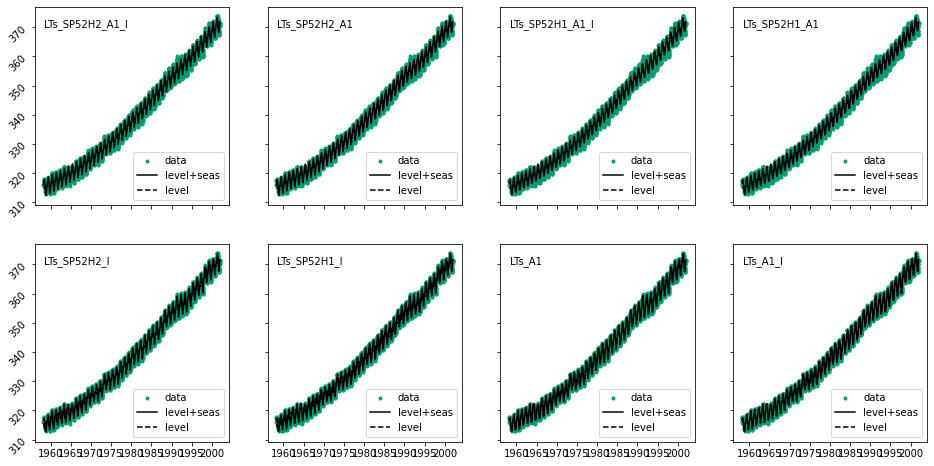

In [16]:
result_list.plot_summary(num=8, figsize=(16,8))

The best fit (according to some chose measure) can be also easily extracted:

/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:866: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(time, self.trend+np.sqrt(self.trend_cov),color=CF,ls='--')
/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:867: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(time, self.trend-np.sqrt(self.trend_cov),color=CF,ls='--')
/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:871: RuntimeWarning: invalid value encountered in sqrt
  _ymax = np.nanpercentile(self.trend+np.sqrt(self.trend_cov),99)
/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper/dlmhelper/data.py:872: RuntimeWarning: invalid value encountered in sqrt
  _ymin = np.nanpercentile(self.trend-np.sqrt(self.trend_cov),1)


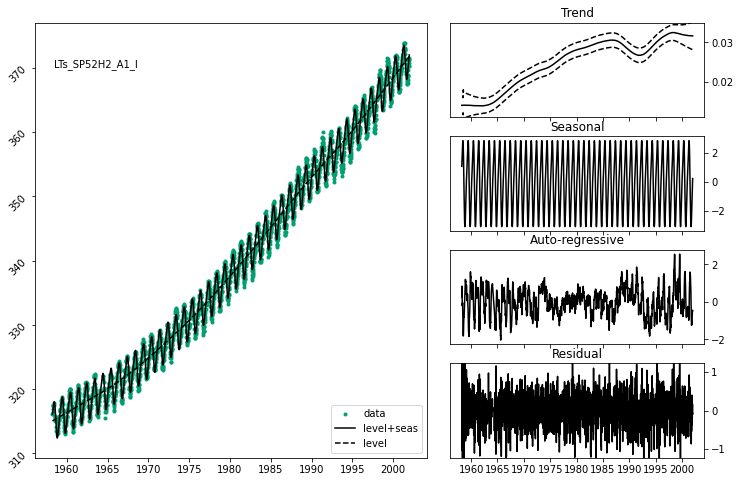

In [17]:
best_fit = result_list.get_best_result(sort='aic')
fig = best_fit.plot_summary(figsize=(12,8))

In [21]:
gr = []
gr_err = []
years = np.arange(1960,2000,1)
for y in years:
    _gr, _gr_err = dlmhelper.tools.annual_level_increase(best_fit, y, tolerance=np.timedelta64(5,'D'))
    gr.append(_gr)
    gr_err.append(_gr_err)
    
gr = np.array(gr)
gr_err = np.array(gr_err)

In [22]:
gr

array([0.72804934, 0.72523133, 0.72795212, 0.7444936 , 0.7812283 ,
       0.83658487, 0.89798806, 0.95853535, 1.01737439, 1.0646211 ,
       1.10207009, 1.13917022, 1.17570719, 1.20198633, 1.22675634,
       1.26716471, 1.32033231, 1.37477305, 1.4173855 , 1.44996736,
       1.47211566, 1.4904921 , 1.51390615, 1.54085844, 1.59271137,
       1.57935891, 1.58934032, 1.58200519, 1.54426396, 1.48554089,
       1.4294814 , 1.39581171, 1.39998833, 1.44726061, 1.51769531,
       1.58506939, 1.63876459, 1.67601254, 1.68740625, 1.67240821])

<BarContainer object of 40 artists>

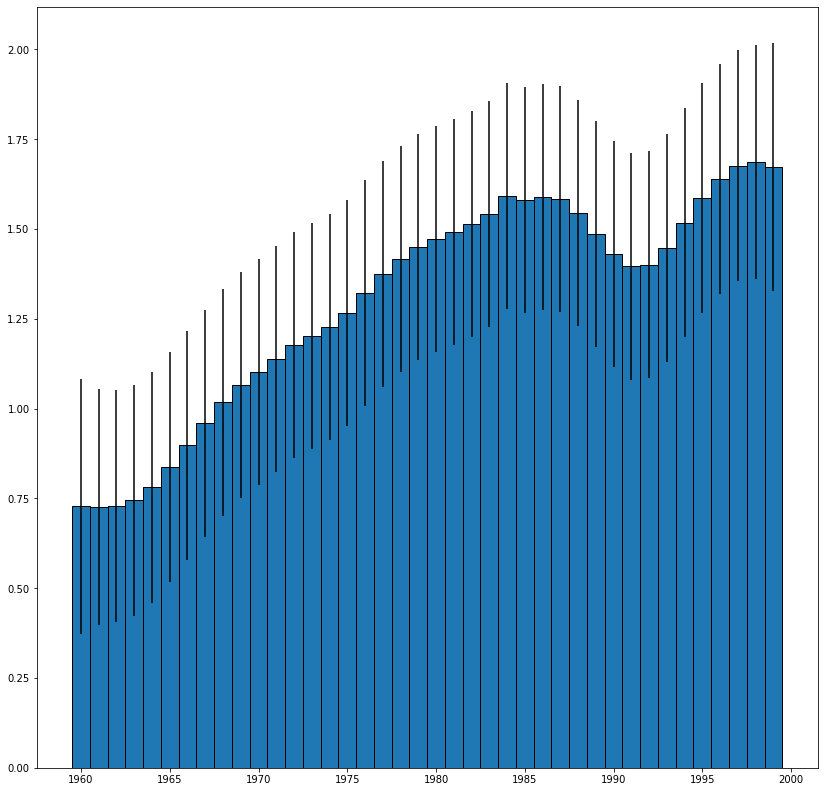

In [25]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)

ax.bar(years,gr,width=1, edgecolor="black", yerr = gr_err)